# DT2470 Lab 01: Teh Signal Processings

by Bob L. T. Sturm

In this first lab you will practice some fundamental concepts of signal processing. You will analyse a chosen sampled sound in the time-, frequency-, and time-frequency domains. You will write something intelligent about your analysis, observing things like periodicity, frequency content, harmonicity, etc. You will also learn to extract low-level features from audio and music signals. In the next lab, you will use these features for some machine learning madness.

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python. Here's some helpful links as well:

- [Numpy API](https://docs.scipy.org/doc/numpy-1.13.0/index.html) - for numerical bits (also see [Numpy Cheat Sheet](https://www.dataquest.io/blog/numpy-cheat-sheet/))
- [Scikit-learn API](https://scikit-learn.org/stable/) - for machine learny stuff
- [Scipy API](https://docs.scipy.org/doc/scipy/reference/) - for mathy bits
- [MatPlotlib API](https://matplotlib.org/3.1.1/api/index.html) - for visually things (also see [MatPlotLib Cheat Sheets](https://github.com/matplotlib/cheatsheets))
- [Pydub API](https://github.com/jiaaro/pydub/blob/master/API.markdown) - for soundy things

I also include some images below so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.

# Part 1: Basics

1. Find an audio file to work with. You could download one from https://sound-effects.bbcrewind.co.uk/search, or https://freesound.org, or maybe you could synthesize one using https://elevenlabs.io "Text to SFX" tool. Maybe you can go out into the real world and record a sound. Anyhoo, write python code to load your sound using pydub (see [pydub.AudioSegment](https://github.com/jiaaro/pydub/blob/master/API.markdown)), and plot a portion of the audio waveform with the appropriate axes labeled "Amplitude" and "Time (s)". The time axis **must be** in seconds. (Use the sample rate of your audio file to find that.) If your audio file has more than one channel, just mix the two channels into one, or select one channel.

Below I show the first 0.6 seconds of my audio file, which I created using https://elevenlabs.io "Text to SFX" tool with the prompt: "car going beep beep".

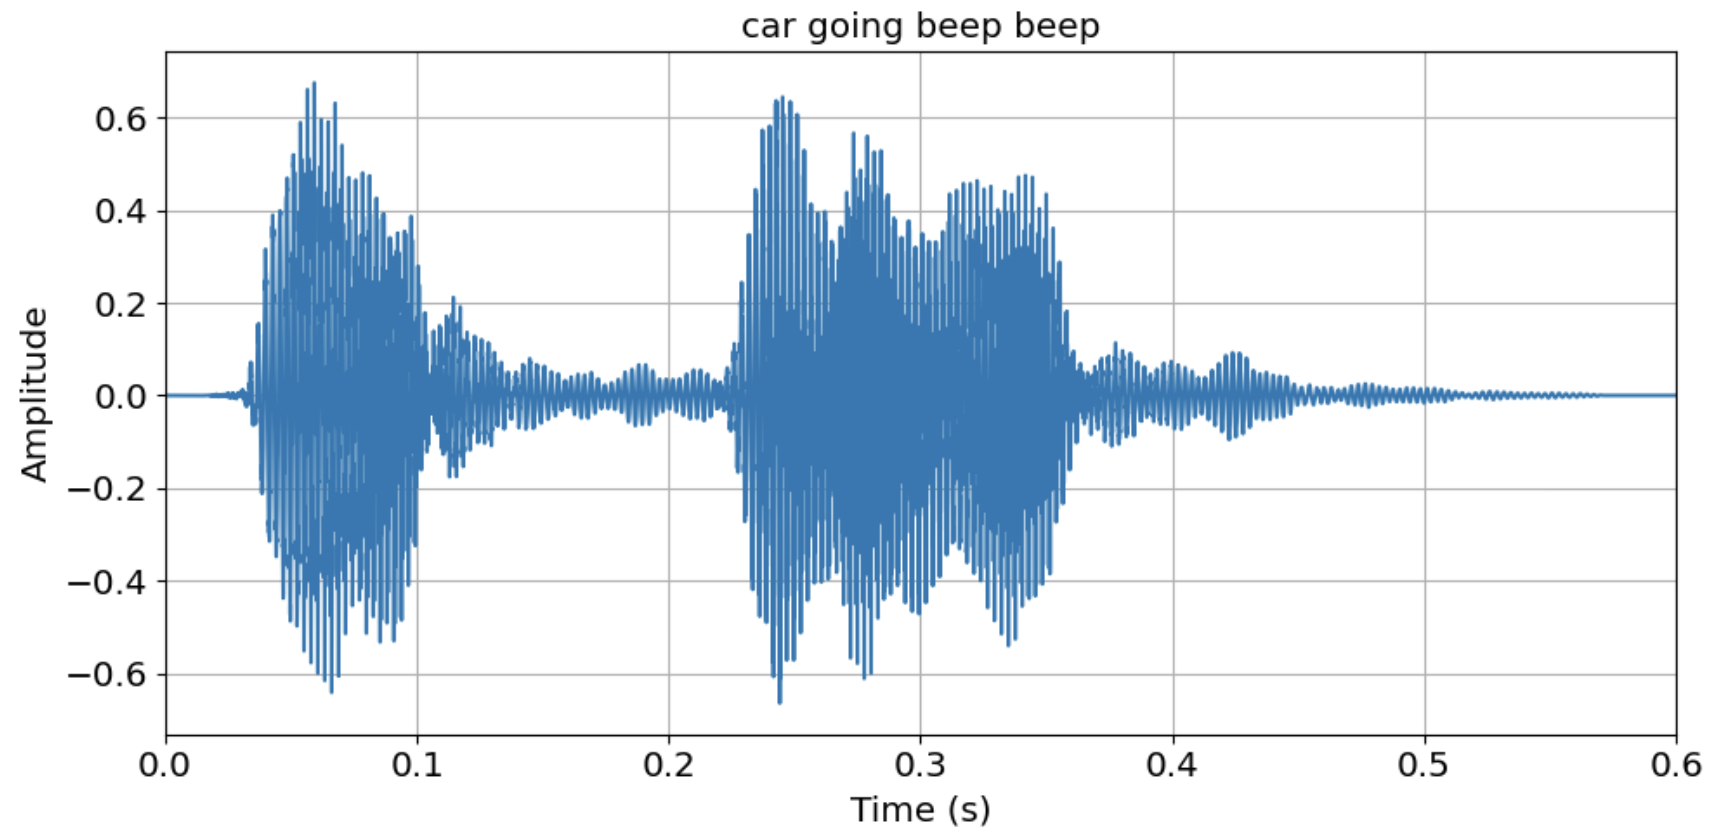

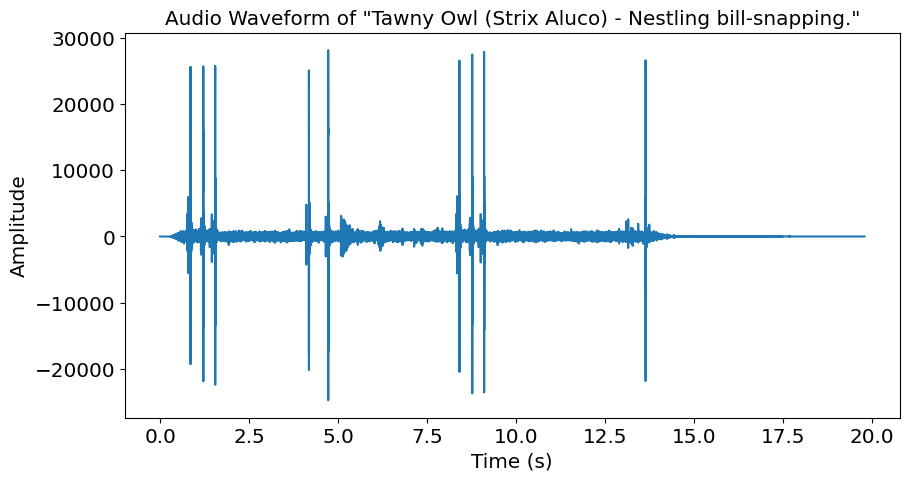

In [14]:
import pydub
import matplotlib.pyplot as plt
import numpy as np

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below
channelOpt = 'mono'
audio = pydub.AudioSegment.from_file('audiotest.wav')


# have option to plot either stereo left or mono(average)
if channelOpt == 'mono':
    audio = audio.set_channels(1)
    samples = np.array(audio.get_array_of_samples())
if channelOpt == 'stereo':
    samples = np.array(audio.get_array_of_samples())
    samples = samples[::2]        


# Create time array for plotting
time = np.linspace(0, len(samples) / audio.frame_rate, num=len(samples))

# Plot the audio data
plt.figure()
plt.plot(time, samples)
plt.title("Audio Waveform of \"Tawny Owl (Strix Aluco) - Nestling bill-snapping.\"")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

We decided to use the audio "Tawny Owl (Strix Aluco) - Nestling bill-snapping." from https://sound-effects.bbcrewind.co.uk/search. This is the first audio present in the search list

2. With the audio file you have chosen, zoom into two different 100 ms portions that have audio data and plot them. 

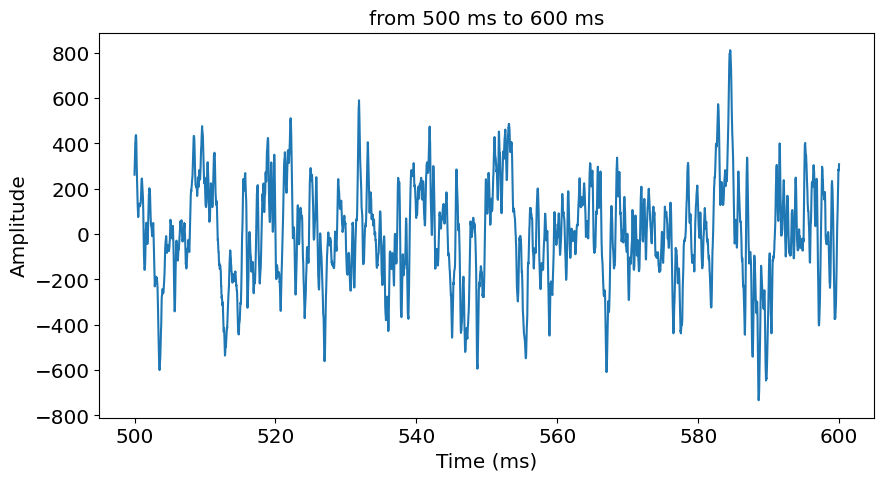

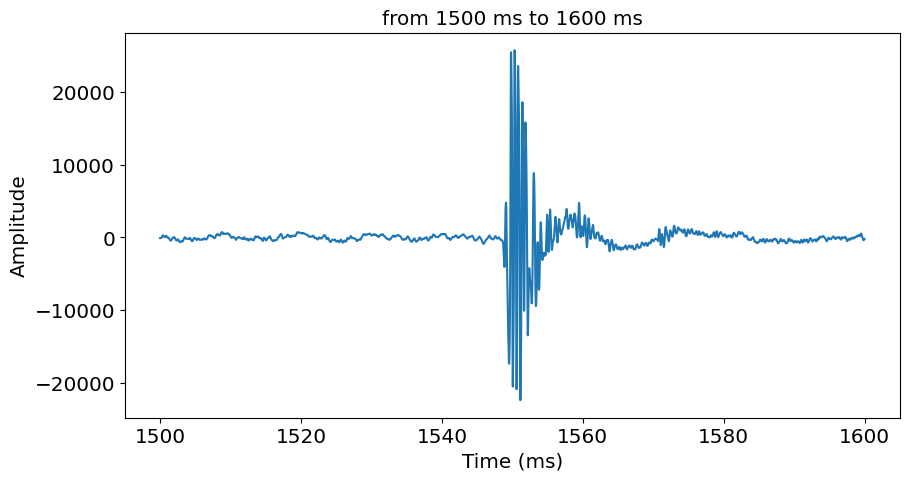

In [27]:
# add your code below
def plot_segment(audio, samples, start_time_ms, end_time_ms):
    # Start and end
    sample_rate = audio.frame_rate
    start_sample = int(start_time_ms * sample_rate / 1000)
    end_sample = int(end_time_ms * sample_rate/ 1000)
    segment_samples = samples[start_sample:end_sample]
    # Slicing axes according to our start and end
    time = np.linspace(start_time_ms, end_time_ms, end_sample - start_sample)


    # Plot
    plt.figure()
    plt.plot(time, segment_samples)
    plt.title(f"from {start_time_ms} ms to {end_time_ms} ms")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude")
    plt.show()
    return segment_samples

first_segment = plot_segment(audio, samples, start_time_ms=500, end_time_ms=600)  # First segment
second_segment = plot_segment(audio, samples, start_time_ms=1500, end_time_ms=1600)  # Second segment

3. For each of the segments you looked at above, window them, and compute their Fourier transforms (hint: see np.fft.fft). Plot their dB magnitude spectra. Appropriately label your axes with "Magnitude (dB)" and "Frequency (kHz)". The frequency axis **must be** in kiloHertz, and limited to 0 to the Nyquist frequency (half the sampling rate). The magnitude axis **must be** in dB. Use the 1) boxcar window and 2) Hann window (hint: see np.hanning).

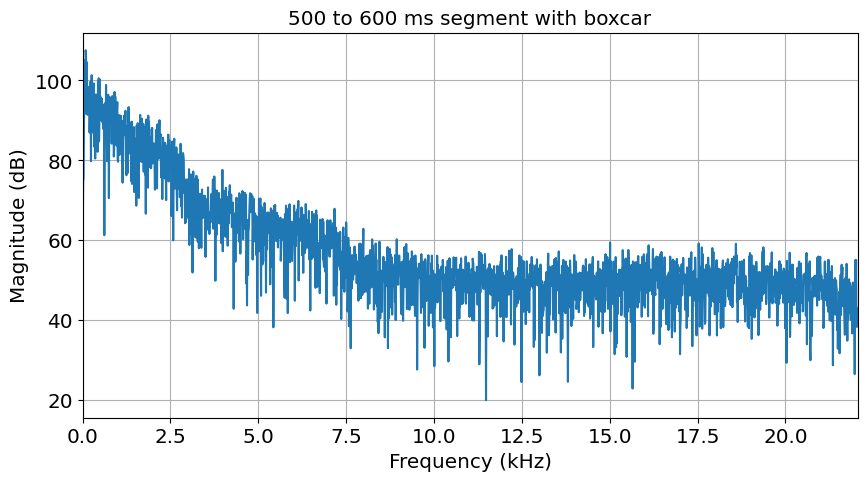

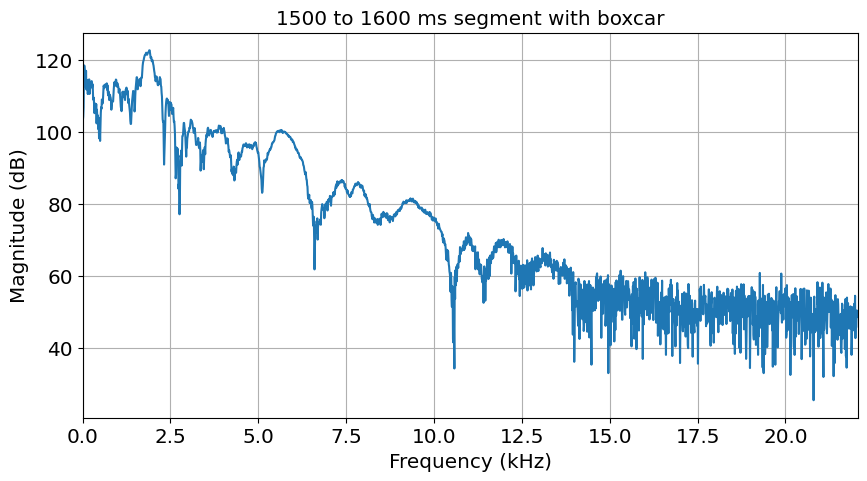

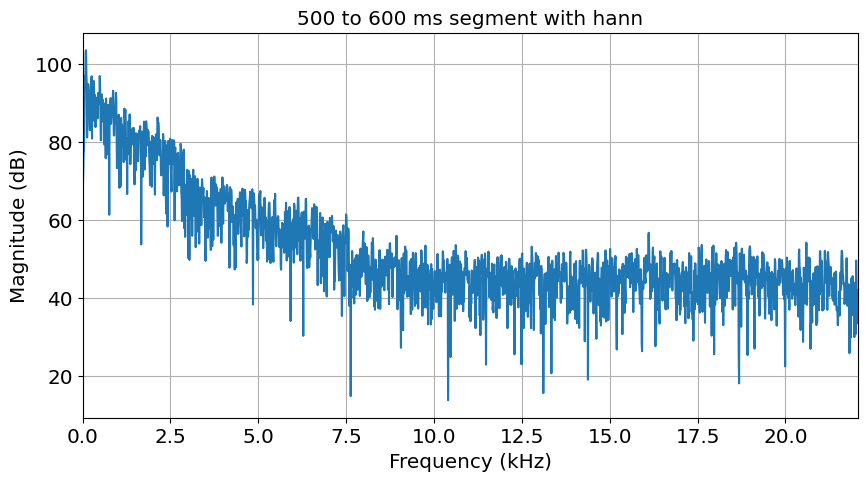

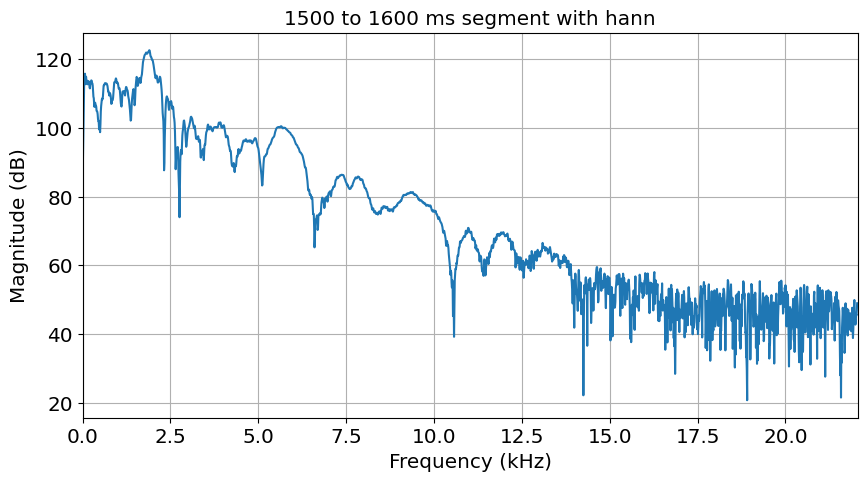

In [44]:
# add your code below
def compute_and_plot_fft(segment_samples, sampling_rate, window_type, segment):

    # Windowing
    if window_type == 'boxcar':
        window = np.ones(len(segment_samples))
    elif window_type == 'hann':
        window = np.hanning(len(segment_samples))
        
    windowed_samples = segment_samples * window

    # Computing the FFT
    fft_result = np.fft.fft(windowed_samples)
    freqs = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)

    # convert magnitude spectrum to d
    magnitude = np.abs(fft_result[:len(fft_result)//2])  # Take positive frequencies only which is half which is needed for nyqvist
    magnitude_to_db = 20 * np.log10(magnitude)  # Convert to dB

    # Frequency axis in kHz and limited from 0 to nyquist freq
    freqs_khz = freqs[:len(freqs)//2] / 1000
    nyquist_freq = sampling_rate / 2 / 1000

    plt.figure()
    plt.plot(freqs_khz, magnitude_to_db)
    plt.xlim([0, nyquist_freq]) # Limit 0 to Nyquist Freq
    plt.title(f"{segment} {window_type}")
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid(True)
    plt.show()

# Boxcar case
compute_and_plot_fft(first_segment, audio.frame_rate, window_type='boxcar', segment='500 to 600 ms segment with')
compute_and_plot_fft(second_segment, audio.frame_rate, window_type='boxcar', segment='1500 to 1600 ms segment with')


# Hann window case
compute_and_plot_fft(first_segment, audio.frame_rate, window_type='hann', segment='500 to 600 ms segment with')
compute_and_plot_fft(second_segment, audio.frame_rate, window_type='hann', segment='1500 to 1600 ms segment with')


4. For the first 10 seconds of your audio file (or shorter if it is not so long), compute and plot its dB magnitude short-time Fourier transform using a Hann window of duration 25 ms with a window hopsize of 10 ms, and an FFT size of 8192 samples (hint: see signal.stft). Do the same using a Hann window of duration 100 ms with a window hopsize of 10 ms. Appropriately label your axes with "Frequency (kHz)" and "Time (s)". The frequency axis must be in kiloHertz, and limited to 0 to 5 kHz. The time axis must be in seconds. Choose a colormap that you feel describes your personality (see https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html). 

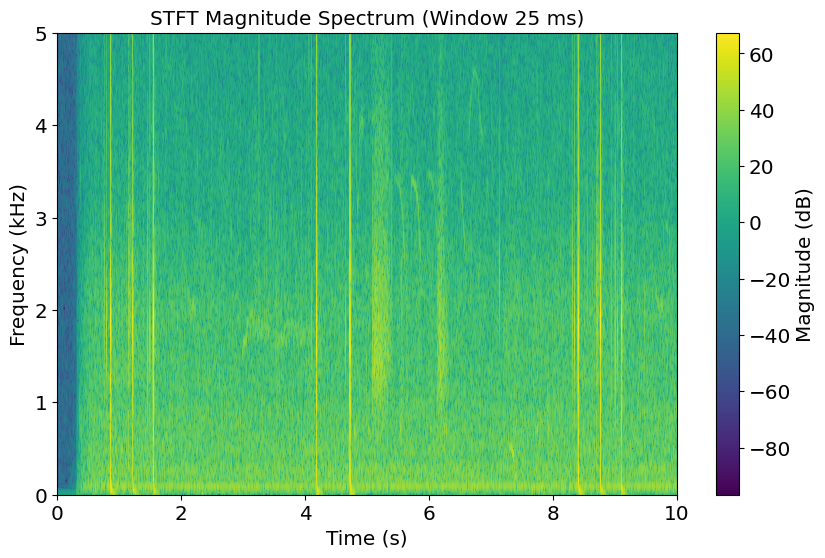

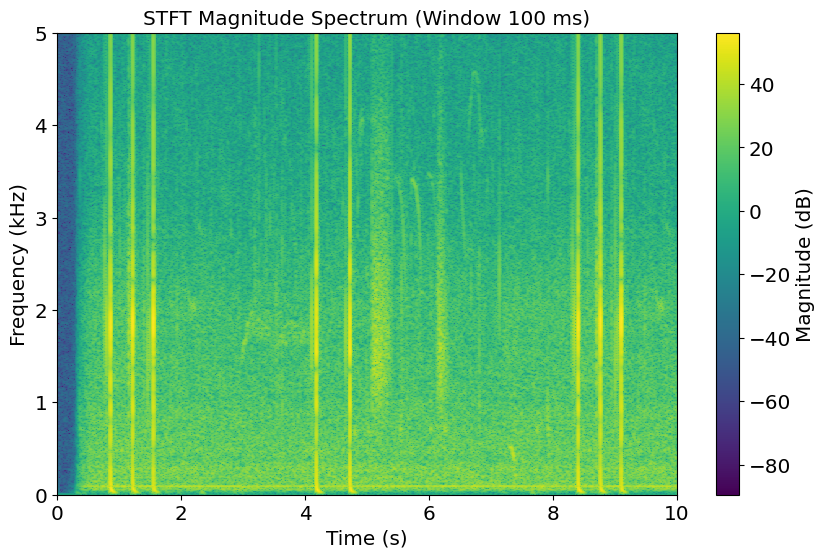

In [57]:
# add your code below
from scipy.signal import stft

def plot_stft(samples, sampling_rate, window_duration_ms, hop_duration_ms, fft_size, colormap):
    # Convert window duration and hop duration from milliseconds to samples
    window_size = int(window_duration_ms * sampling_rate / 1000)
    hop_size = int(hop_duration_ms * sampling_rate / 1000)

    # Compute STFT
    f, t, Zxx = stft(samples, fs=sampling_rate, window='hann', nperseg=window_size, noverlap=window_size - hop_size, nfft=fft_size)

    # convert to KHz and limit to <5KHz
    f_khz = f / 1000
    f_indices = f_khz <= 5
    Zxx_db = 20 * np.log10(np.abs(Zxx)) # conversion to dB

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f_khz[f_indices], Zxx_db[f_indices, :], cmap=colormap)
    plt.title(f'Window {window_duration_ms} ms')
    plt.ylabel('Frequency (kHz)')
    plt.xlabel('Time (s)')
    plt.colorbar(label='Magnitude (dB)')
    plt.show()

duration_in_seconds = 10
samples = samples[:audio.frame_rate * duration_in_seconds]

# 25 ms hann window and 10 ms hopsize
plot_stft(samples, audio.frame_rate, window_duration_ms=25, hop_duration_ms=10, fft_size=8192, colormap='viridis')

# 100 ms hann window and 10 ms hopsize
plot_stft(samples, audio.frame_rate, window_duration_ms=100, hop_duration_ms=10, fft_size=8192, colormap='viridis')

5. Describe some of the advantages and nackdelar of using short or long time windows for time-frequency analysis.

Using shorter time windows generally yields a good resolution in the time domain but not in the frequency domain and using longer time windows yields a good resolution in the frequency domain but not in the time domain. Thus, when working with time-frequency analysis there is a trade-off regarding the length of the time window we wish to use. Sizing the window "appropiately" depends on our task and its application. 



6. For the first 10 seconds of your audio file (or shorter if it is not so long), use the [librosa package](https://github.com/librosa) to compute its Mel spectrogram using Hann windows of duration 25 ms with a window hopsize of 10 ms. Use 128 Mel bands and an FFT size of 8192 samples. Display the dB magnitude with reference to the max power observed, and limit your y-axis between 0 and 5 kHz. Use the same colormap as you used above. See https://github.com/librosa/librosa/blob/main/examples/LibROSA%20demo.ipynb for help. 

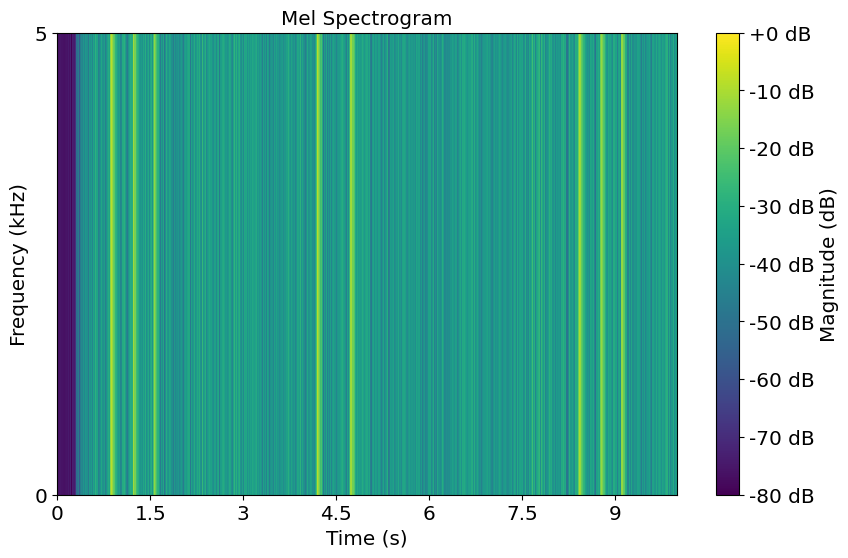

In [65]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
# Params
window_duration_ms=25
hopsize_ms=10
fft_size=8192
n_mels=128
max_freq=5
y, sr = librosa.load('audiotest.wav', sr=audio.frame_rate, duration=10)# Load audio

# Convert window duration and hop duration to samples
hop_length = int(hopsize_ms * sr / 1000)
win_length = int(window_duration_ms * sr / 1000)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=fft_size,hop_length=hop_length, win_length=win_length, n_mels=n_mels, window='hann')
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max) # dB magnitude with reference to the max power observed

# Create the Mel spectrogram plot
plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel',fmax=max_freq * 1000, cmap='viridis')

plt.colorbar(format='%+2.0f dB', label='Magnitude (dB)')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.ylim([0, max_freq])
plt.show()


# Part 2: Extracting features

1. Write a function that will take in the samples of an audio file, a frame size in samples, a frame hop size in samples, and compute and return the number of waveform zero crossings in each frame. A waveform x[n] undergoes a zero crossing when sign(x[n]) and sign(x[n+1]) are different. You will have to slice x[n] into chunks of a specified size, and for each of those chunks, count the number of sign changes.

In [75]:
# add your code below
def zero_crossings(samples, frame_size, hop_size):    
    zcr = librosa.feature.zero_crossing_rate(y=samples, frame_length=frame_size, hop_length=hop_size)
    zero_crossing_each_frame = zcr[0] * frame_size  #Multiply by frame_length to get total zero crossings in each chunk
    return zero_crossing_each_frame

2. Using your function, compute zero crossings of 10 ms frames hopped 50% of that for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds (or shorter) of your time domain waveform, and plot the series of zero crossings you extracted.

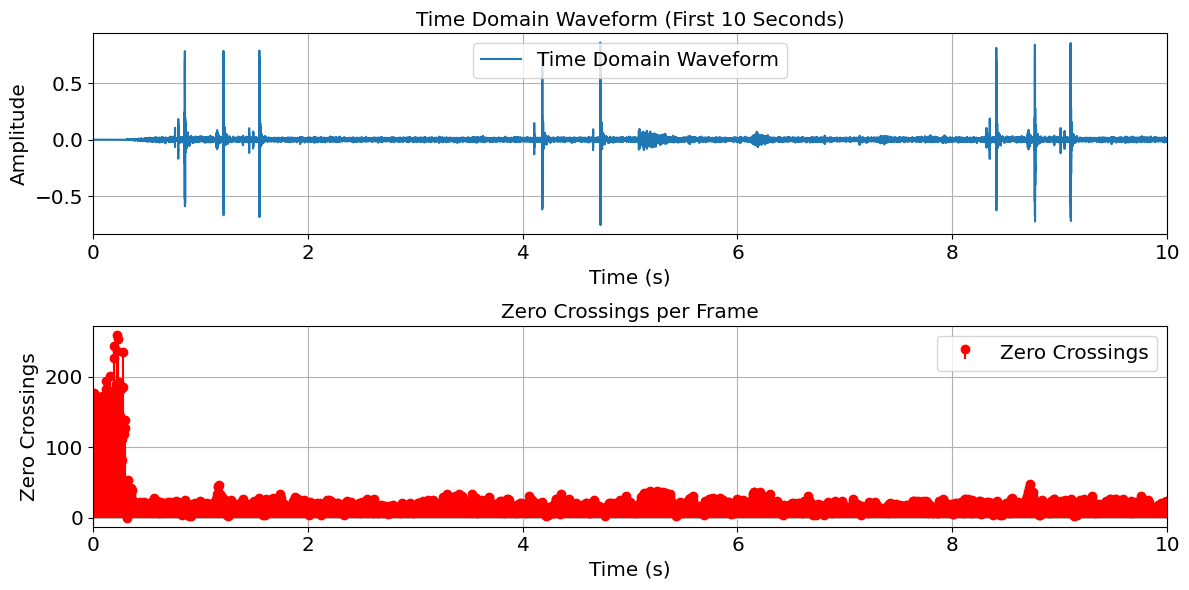

In [76]:
# add your code below
y, sr = librosa.load('audiotest.wav', sr=audio.frame_rate, duration=10)# Load audio
frame_size = int(10 * sr / 1000)  # 10 ms frame size
hop_size = int(5 * sr / 1000)      # hopped 50 %
zero_crossings = zero_crossings(y, frame_size, hop_size)

time_waveform = np.linspace(0, len(y) / sr, num=len(y))

# Time vector for zero crossings plot, first 10 seconds
time_zero_crossings = np.arange(len(zero_crossings)) * hop_size / sr
waveform_limit = time_waveform <= 10
zero_crossings_limit = time_zero_crossings <= 10

# Plot the time-domain waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_waveform, y, label='Time Domain Waveform')
plt.title('Time Domain Waveform (First 10 Seconds)')
plt.xlim([0, 10])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the zero crossings
plt.subplot(2, 1, 2)
plt.stem(time_zero_crossings[zero_crossings_limit], np.array(zero_crossings)[zero_crossings_limit], basefmt=" ", linefmt='r-', markerfmt='ro', label='Zero Crossings')
plt.title('Zero Crossings per Frame')
plt.xlim([0, 10])
plt.xlabel('Time (s)')
plt.ylabel('Zero Crossings')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


3. Write a function that will take in the samples of an audio file, a frame size in samples, a hop size in samples, and a sampling rate, and compute and return the spectral centroid of each frame. The spectral centroid of a rectangular window of audio $x[n]$ of length $N$ (even) is defined as 
$$ R_{0.5}(x) = \frac{\sum_{k=0}^{N/2+1} \frac{F_s k}{N} |X[k]|}{\sum_{k=0}^{N/2+1} |X[k]|} $$
where $X[k]$ is the DFT of $x[n]$, and $F_s$ is the sampling rate.

In [13]:
# add your code below
    

4. Using your function, compute spectral centroid features for contiguous 10 ms frames hopped 50% for the audio file you used in part 1. (Ignore any frames at the end of audio files that are less than that length.) Plot the first 10 seconds (or shorter) of your time domain waveform, and plot the series of spectral centroids you extracted. (BEWARE of nan and infs in your output. Handle them appropriately.)

In [14]:
# add your code below



5. Using the librosa package (https://github.com/librosa), extract the first 10 MFCC features from your audio file using Hann windows of 25 ms duration and 10 ms hop size, and an FFT size of 8192 samples. Display the extracted MFCCs for the first 10 seconds (or shorter).

In [15]:
# add your code below
